In [19]:
import pandas as pd

In [28]:
Netflix = pd.read_csv("netflix.csv")

In [412]:
Netflix.head(5)

,Type,Title,Director,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Years_Diff
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,18894 days 23:59:59.999997980
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,1970-01-01 00:00:00.000002021,Mature Audience,1 Season,"Crime TV Shows, International TV Shows, TV Act...",18893 days 23:59:59.999997979
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,1970-01-01 00:00:00.000002021,Mature Audience,1 Season,"TV Dramas, TV Horror, TV Mysteries",18893 days 23:59:59.999997979
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,1970-01-01 00:00:00.000002021,Parental Guidance,91 min,"Children & Family Movies, Comedies",18891 days 23:59:59.999997979
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1970-01-01 00:00:00.000001993,Mature Audience,125 min,"Dramas, Independent Movies, International Movies",18893 days 23:59:59.999998007


In [405]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Type          8790 non-null   object        
 1   Title         8790 non-null   object        
 2   Director      8790 non-null   object        
 3   Country       8790 non-null   object        
 4   Date_Added    8790 non-null   object        
 5   Release_Year  8790 non-null   datetime64[ns]
 6   Rating        8790 non-null   object        
 7   Duration      8790 non-null   object        
 8   Listed_In     8790 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 618.2+ KB


In [30]:
Netflix = Netflix.rename(columns = lambda x: x.title())

In [31]:
Netflix.isnull().sum()

Show_Id         0
Type            0
Title           0
Director        0
Country         0
Date_Added      0
Release_Year    0
Rating          0
Duration        0
Listed_In       0
dtype: int64

In [32]:
Netflix["Show_Id"].unique()

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'], dtype=object)

In [33]:
Netflix = Netflix.drop("Show_Id", axis = 1)

In [34]:
Netflix["Type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [35]:
Netflix["Director"].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [38]:
Netflix["Country"].unique()
#Outliers:
#1. West Germany
#2. Soviet Union
#3. Not Given (Unspecified)

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Unspecified', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'Iran', 'Venezuela', 'Slovenia', 'Guatemala', 'Jamaica',
 

In [37]:
dict1 = {"West Germany" : "Germany", "Unspecified" : "Soviet Union", "Not Given" : "Unspecified"}
Netflix = Netflix.replace({"Country": dict1})

In [41]:
Netflix["Listed_In"].unique()

array(['Documentaries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'TV Dramas, TV Horror, TV Mysteries',
       'Children & Family Movies, Comedies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Children & Family Movies, Comedies, Music & Musicals',
       'Dramas, International Movies',
       'Children & Family Movies, Music & Musicals',
       'Dramas, International Movies, Music & Musicals', 'Movies',
       'Comedies', 'Docuseries, Reality TV',
       'British TV Shows, Crime TV Shows, Docuseries',
       'Children & Family Movies', "Kids' TV",
       'Documentaries, International Movies',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Comedies, International Movies, Romantic Movies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'TV Comedies', 'I

In [45]:
Netflix["Rating"].unique()

array(['PG-13', 'Mature Audience', 'Parental Guidance', 'TV-14', 'TV-Y7',
       'Children Only', 'General Audience', 'R(Restricted)', 'G', 'NC-17',
       'Not Rated', 'TV-Y7 (Fantasy Violence)', 'Unrated'], dtype=object)

In [44]:
dict2= {"TV-MA" : "Mature Audience", "TV-PG" : "Parental Guidance", "PG" : "Parental Guidance", "TV-G" : "General Audience", "R" : "R(Restricted)",
       "TV-G" : "General Audience", "NR" : "Not Rated", "TV-Y" : "Children Only", "TV-Y7-FV" : "TV-Y7 (Fantasy Violence)", "UR" : "Unrated"}
Netflix = Netflix.replace({"Rating" : dict2})

In [53]:
Top_Shows = Netflix["Title"].value_counts().head(5).reset_index()
Top_Shows

,Title,count
0,9-Feb,2
1,15-Aug,2
2,22-Jul,2
3,Dick Johnson Is Dead,1
4,SGT. Will Gardner,1


In [72]:
import matplotlib.pyplot as plt

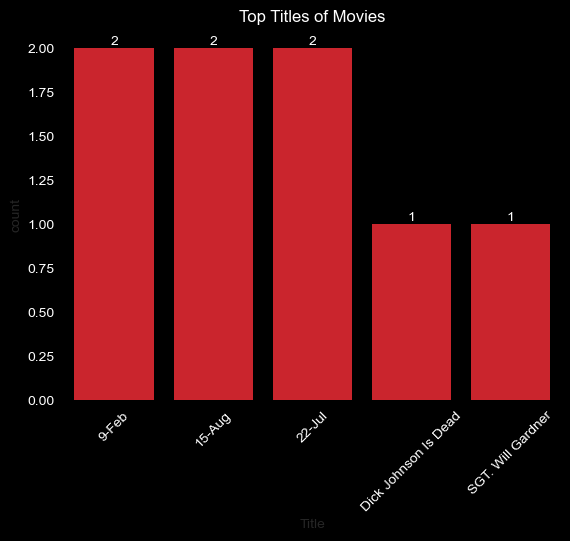

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns
barplot = sns.barplot(x = "Title", y = "count", data = Top_Shows, color = "#e50914")
barplot.set_title("Top Titles of Movies", color ="White")
barplot.set_facecolor("black")
barplot.figure.patch.set_facecolor("black")
barplot.tick_params(axis ="x", colors = "white")
barplot.tick_params(axis = "y", colors ="white")


for p in barplot.patches:
    barplot.text(p.get_x() + p.get_width() / 2, p.get_height(), 
                 round(p.get_height(), ), 
                 color='white', 
                 ha='center', 
                 va='bottom')

for spine in barplot.spines.values():
    spine.set_visible(False)

barplot.grid(False)

for patch in barplot.patches:
    patch.set_edgecolor('none') 
    
plt.xticks(rotation =45)
plt.show()

In [103]:
Show_Distribution = Netflix["Type"].value_counts()
Show_Distribution

Type
Movie      6126
TV Show    2664
Name: count, dtype: int64

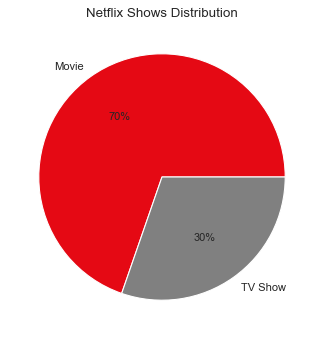

In [310]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(8,5), dpi = 80)
pieplot =plt.pie(Show_Distribution, labels = Show_Distribution.index, autopct = "%1.0f%%",  colors = ["#e50914", "grey"] )
plt.title("Netflix Shows Distribution")
ax.set_facecolor("white")
#plt.savefig("pie.png", dpi = 100, bbox_inches = "tight", facecolor ="red", transparent=True) #to Save
plt.show()

In [138]:
Top_10_Countries= Netflix["Country"].value_counts().head(10).reset_index()
Top_10_Countries

,Country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Unspecified,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


In [289]:
country_counts = Netflix.groupby('Type')['Country'].nunique()
country_counts

Type
Movie      78
TV Show    59
Name: Country, dtype: int64

In [134]:
Netflix["Director"].value_counts().head(5)

Director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: count, dtype: int64

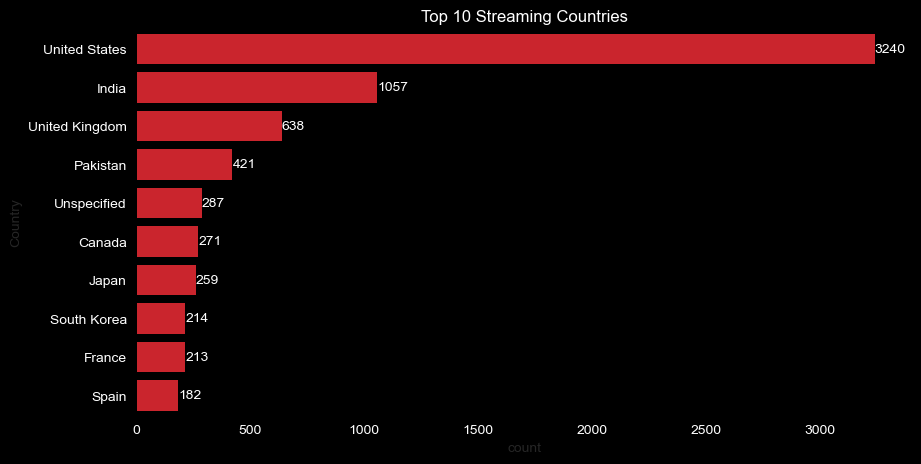

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(10,5))
barplot = sns.barplot(x = "count", y = "Country", data = Top_10_Countries, color= "#e50914")
#To change the color of the plot background
barplot.set_facecolor("Black")
#To change the color of the Axis labels and Title
barplot.tick_params(axis = "x", colors = "white")
barplot.tick_params(axis= "y", colors = "white")
barplot.set_title("Top 10 Streaming Countries" ,color = "white")

# For data labels
for index, row in Top_10_Countries.iterrows():
    barplot.text(row['count'], index, round(row['count'], 2), color='white', ha="left", va="center")

barplot.grid(False)

for spine in barplot.spines.values():
    spine.set_visible(False)


for patch in barplot.patches:
    patch.set_edgecolor('none') 

barplot.figure.patch.set_facecolor("Black")
plt.title("Top 10 Streaming Countries")
plt.show()

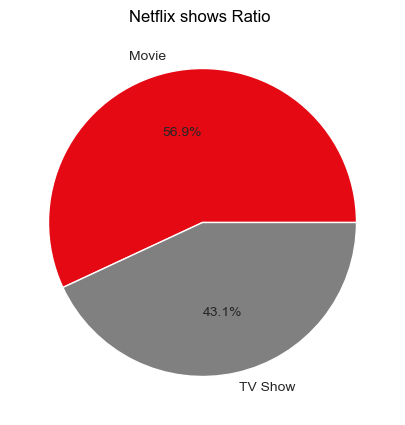

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize =(10,5))
pieplots = plt.pie(country_counts,labels= country_counts.index, autopct = "%1.1f%%", colors = ["#e50914", "grey"] )


ax.set_facecolor('black')
ax.patch.set_facecolor("white")

plt.title("Netflix shows Ratio ", color = "black")
plt.show()

In [319]:
Ratings = Netflix["Rating"].value_counts().head(5).reset_index()
Ratings

,Rating,count
0,Mature Audience,3205
1,TV-14,2157
2,Parental Guidance,1148
3,R(Restricted),799
4,PG-13,490


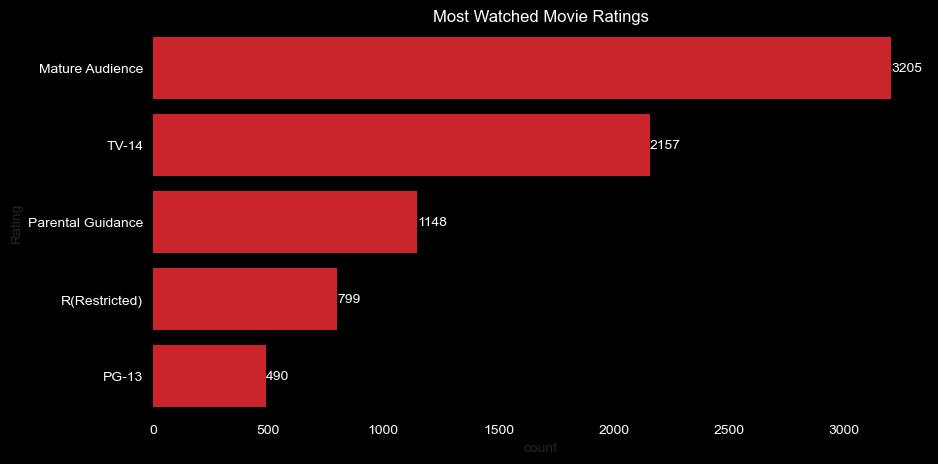

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(10,5))
barplot = sns.barplot(x = "count", y = "Rating", data = Ratings, color= "#e50914")
#To change the color of the plot background
barplot.set_facecolor("Black")
#To change the color of the Axis labels and Title
barplot.tick_params(axis = "x", colors = "White")
barplot.tick_params(axis= "y", colors = "white")
barplot.set_title("Top 10 Streaming Ratings" ,color = "white")

# For data labels
for index, row in Ratings.iterrows():
    barplot.text(row['count'], index, round(row['count'], 2), color='white', ha="left", va="center")

barplot.grid(False)

for spine in barplot.spines.values():
    spine.set_visible(False)


for patch in barplot.patches:
    patch.set_edgecolor('none') 

barplot.figure.patch.set_facecolor("Black")
plt.title("Most Watched Movie Ratings")
plt.show()

In [339]:
Rating_By_Countries = Netflix.groupby("Rating")["Country"].nunique().head(10).sort_values(ascending = False).reset_index()
Rating_By_Countries

,Rating,Country
0,Mature Audience,74
1,TV-14,60
2,Parental Guidance,48
3,R(Restricted),40
4,General Audience,31
5,PG-13,29
6,Children Only,24
7,Not Rated,20
8,G,8
9,NC-17,3


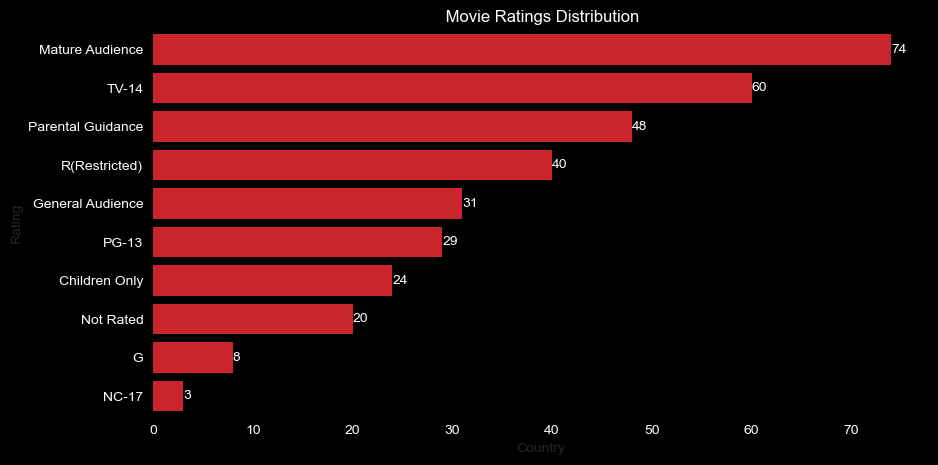

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(10,5))
barplot = sns.barplot(x = "Country", y = "Rating", data = Rating_By_Countries, color= "#e50914")
#To change the color of the plot background
barplot.set_facecolor("Black")
#To change the color of the Axis labels and Title
barplot.tick_params(axis = "x", colors = "White")
barplot.tick_params(axis= "y", colors = "white")
barplot.set_title("Top 10 Streaming Ratings" ,color = "white")

# For data labels
for index, row in Rating_By_Countries.iterrows():
    barplot.text(row['Country'], index, round(row['Country'], 2), color='white', ha="left", va="center")

barplot.grid(False)

for spine in barplot.spines.values():
    spine.set_visible(False)

for patch in barplot.patches:
    patch.set_edgecolor('none') 

barplot.figure.patch.set_facecolor("Black")
plt.title(" Movie Ratings Distribution By Country")
plt.show()

In [375]:
Movie_Release_Year=Netflix["Release_Year"].value_counts().head(5).reset_index()
Movie_Release_Year

,Release_Year,count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901


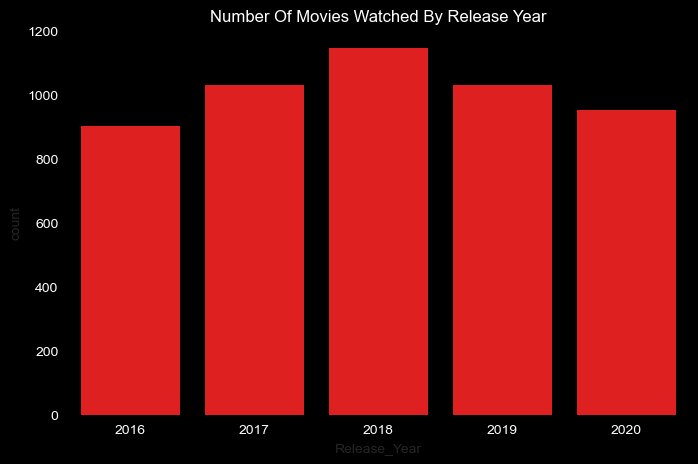

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.figure(figsize = (8,5))
pieplot = sns.barplot(x = "Release_Year", y = "count" ,data = Movie_Release_Year, color = "red")

pieplot.set_facecolor("black")
pieplot.figure.patch.set_facecolor("black")

pieplot.tick_params(axis = "x", colors = "white")
pieplot.tick_params(axis = "y", colors = "white")
pieplot.set_title("Number Of Movies Watched By Release Year", color ="white")

#For The Data labels
#for index, row in Movie_Release_Year.iterrows():
 #   pieplot.text(row['count'], index, round(row['count'], 2), color='white', ha="left", va="center")

for spine in pieplot.spines.values():
    spine.set_visible(False)

for patch in pieplot.patches:
    patch.set_edgecolor('none')


pieplot.grid(False)
plt.show()


In [407]:
#To turn to date 
Netflix["Release_Year"] = pd.to_datetime(Netflix["Release_Year"])

In [406]:
Netflix["Date_Added"] = pd.to_datetime(Netflix["Date_Added"])

In [411]:
Netflix["Years_Diff"] = Netflix["Date_Added"] - Netflix["Release_Year"]

In [ ]:
Netflix = Netflix.drop(Ne)